# Data Projection--Dimension Reduction
数据投影是指将数据从高维空间投影到低维空间的过程。在机器学习中，数据投影是一种常见的数据预处理方法，它可以用于数据可视化、特征选择、降维等应用场景。在这个notebook中，我们将介绍PCA, t-SNE, Fisher's Linear Discriminant(LDA)等数据投影方法，并通过实例演示如何使用这些方法进行数据投影。

INCLUDE:
1. PCA: Principal Component Analysis: 
    - Loading Matrix & Explained Variance
    - Visualization
    - inverse_transform
    - Practice： Digits Dataset
2. LDA: Linear Discriminant Analysis
3. t-SNE: t-distributed Stochastic Neighbor Embedding
4. UMAP: uniform Manifold Approximation and Projection
5. GTM: Generative Topographic Mapping

## Conclusion for Projection Methods
数据投影算法是一种重要的数据降维技术，通过减少数据集中的特征数量来简化数据，同时尽可能保留重要的信息。以下是你提到的几种常见算法的原理、优缺点和使用情景：

### 1. 主成分分析（PCA）
- **原理**：PCA通过线性变换将原始数据变换到一组线性无关的表示上，这组新的变量称为主成分。第一个主成分具有最大方差（即，数据最分散的方向），每个后续的主成分都在与前面主成分正交的意义上具有最大的方差。
- **优点**：计算简便，去除数据冗余，降低数据维度，可用于发现最重要的特征。
- **缺点**：只能发现线性关系，对数据的异常值敏感。
- **使用情景**：适用于探索性数据分析、预处理阶段降维、可视化等。

### 2. 线性判别分析（LDA）
- **原理**：LDA旨在找到一个能够最大化类间分散性和最小化类内分散性的特征空间。它是监督学习的降维技术，用于分类问题。
- **优点**：适用于分类问题中的降维，可以考虑类别信息，优于PCA。
- **缺点**：假设数据服从高斯分布，相同协方差矩阵，这些假设在实际中可能不成立。
- **使用情景**：适用于需要监督学习的分类问题中。

### 3. t-分布随机邻域嵌入（t-SNE）
- **原理**：t-SNE通过概率分布在高维和低维空间中建立相似性，以保持高维数据点间的相对距离。
- **优点**：能够揭示数据在低维空间中的结构，尤其是在可视化高维数据集时。
- **缺点**：计算成本高，对超参数敏感，可能难以选择最佳参数。
- **使用情景**：高维数据的可视化，如在生物信息学、社交网络分析中的应用。

### 4. 自组织映射（SOM）
- **原理**：SOM是一种无监督学习算法，通过训练神经网络模拟高维数据在低维（通常是二维）空间的分布。
- **优点**：能够保持数据的拓扑结构，适用于复杂模式识别和可视化。
- **缺点**：训练过程可能比较长，参数选择有一定难度。
- **使用情景**：数据可视化，尤其是在探索数据模式和群集时。

### 5. Isomap
- **原理**：Isomap是一种流形学习技术，通过保持所有数据点间的测地线距离来实现降维，旨在揭示数据的内在几何结构。
- **优点**：能够在降维时考虑非线性结构。
- **缺点**：计算复杂度高，对邻居大小选择敏感。
- **使用情景**：适用于需要揭示数据内在几何结构的场景。

### 6. 统一流形近似和投影（UMAP）
- **原理**：UMAP是一种流形学习技术，它基于拓扑结构的概念，能够在保持局部和全局数据结构的同时实现降维。
- **优点**：能够在降维时考虑非线性结构，计算效率高。
- **缺点**：对超参数敏感，可能难以选择最佳参数。
- **使用情景**：适用于需要揭示数据内在几何结构的场景。

### 7. 生成拓扑映射（GTM）
- **原理**：GTM是一种概率模型，通过学习数据的概率分布来实现降维，旨在揭示数据的内在结构。
- **优点**：能够在降维时考虑非线性结构，能够提供概率分布信息。
- **缺点**：计算复杂度高，对超参数敏感。
- **使用情景**：适用于需要揭示数据内在结构和提供概率信息的场景。

In [36]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import umap
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE,Isomap
import idx2numpy
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
# load iris dataset
iris = load_iris()
X = iris.data # [150, 4]
y = iris.target # [150,]
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

# 1. PCA: Principal Component Analysis
## 1. PCA model
PCA是一种常见的数据降维方法,属于无监督学习的一种。它通过线性变换将原始数据投影到低维空间。PCA的基本思想是将高维数据投影到一个低维空间，使得投影后的数据尽可能保留原始数据的信息。PCA通过找到数据中方差最大的方向，然后将数据投影到这些方向上，以此来降低数据的维度。这些方向称为主成分，是数据集中变异性最大的方向。

由于pca对度量尺度敏感，因此在应用pca之前，通常需要对数据进行标准化处理。

使用iris数据集，其中包含4个特征，我们将使用PCA将数据投影到2维空间，以便可视化。

In [8]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 应用PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

## 2. Loading Matrix & Explained Variance
### Loading Matrix
Loading Matrix是PCA模型的一个重要属性，它是一个矩阵，用于将原始特征投影到主成分空间。每一行表示一个主成分，每一列表示一个原始特征。通过载荷矩阵，你可以理解每个主成分反映了原始特征空间的哪些方向。例如，如果某个特征在某个主成分上的载荷很高，那么这个主成分在很大程度上反映了该特征的变异。载荷的正负号还可以帮助你了解特征之间的关系，如同向载荷表示特征在该成分上同向变化，反之亦然。

在PCA中，每个主成分都是原始数据特征的加权线性组合，这些权重（或系数）就构成了载荷矩阵。如果我们假设有四个特征（feature1, feature2, feature3, feature4），那么第一个主成分（PC1）可以表示为：

$$\[ \text{PC1} = 0.361387 \times \text{feature1} - 0.084523 \times \text{feature2} + 0.856671 \times \text{feature3} + 0.358289 \times \text{feature4} \]$$

这个表达式反映了每个特征对第一个主成分的贡献。系数的大小表示了对应特征在构成该主成分时的相对重要性，而系数的正负号则表示该特征与主成分的相关方向。在这个例子中，feature3对PC1的贡献最大，这意味着PC1在很大程度上捕捉了feature3的变异。

在PCA模型中，Loading Matrix即为模型的`components_`属性。

---

### Explained Variance
Explained Variance是PCA模型的另一个重要属性，它表示每个主成分解释的方差比例。在PCA中，主成分是按照方差大小排序的，因此Explained Variance也可以理解为每个主成分的重要性。

示例中pca1的explained variance为0.9246，表示第一个主成分解释了92.46%的方差。这意味着，如果我们只保留第一个主成分，那么我们就可以保留92.46%的数据信息。通常，我们会根据Explained Variance来选择保留的主成分数量。

在PCA模型中，Explained Variance即为模型的`explained_variance_ratio_`属性。

In [9]:
# loading matrix
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [10]:
# explained variance
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

## 3. Visualization
对于数据投影或降维的方式，我们的目的都是使用这样的算法将高维数据降维到2或3维，以便可视化。在这个示例中，我们使用PCA将iris数据投影到2维空间，并使用散点图进行可视化。

PCA图：通过PCA，数据被投影到了两个主要成分上，这两个成分捕获了数据的最大方差。虽然不同类别的数据有一定程度的分离，但仍有一些重叠。这是因为PCA是一种无监督学习方法，它只关注数据的方差，而不关注数据的类别。因此，PCA在数据可视化时可能无法很好地区分不同类别的数据。

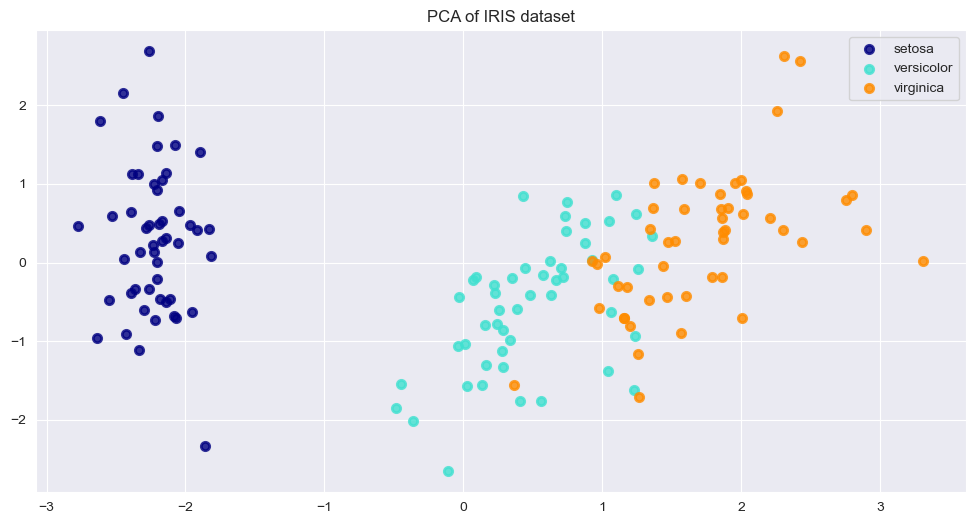

In [20]:
# visualization
plt.figure(figsize=(12, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

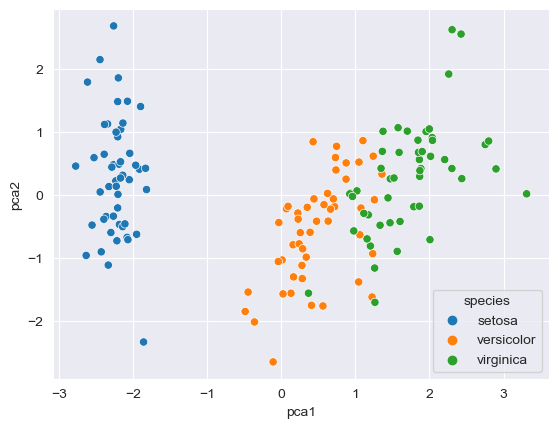

In [21]:
# 使用x=pca1, y=pca2, hue=species绘制散点图
df = pd.DataFrame(X_pca, columns=['pca1', 'pca2'])
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

sns.scatterplot(x='pca1', y='pca2', hue='species', data=df)
plt.show()

### inverse_transform
PCA的inverse_transform方法是用来将经过PCA变换（降维）后的数据恢复到原始数据空间的方法。这个过程不能保证完全恢复原始数据，尤其是当降维操作导致信息损失时。然而，它可以提供一个基于主成分保留的信息量重构的数据版本。

```python
# inverse transform
X_recovered = pca.inverse_transform(X_pca)
```

需要注意的是，X_recovered不会完全等同于原始数据X，尤其是当PCA降维时丢失了一部分信息（即，当n_components小于原始特征数时）。然而，这个近似数据可以用来评估降维的影响和重构质量。


对于LDA（线性判别分析）和t-SNE（t-分布随机邻域嵌入），情况有所不同，并且它们的处理方式与PCA相比也有区别。


- LDA理论上可以实现`inverse_transform`，尽管在`sklearn`中没有直接提供。
- t-SNE由于其非线性降维的特性，不支持`inverse_transform`操作，也没有简单的方法来从其降维结果中恢复原始数据。

### 4. Practice： Digits Dataset
在这个练习中，我们将使用手写数字数据集（digits dataset）来演示PCA的应用。手写数字数据集包含1797个8x8像素的手写数字图像，每个像素的值在0到16之间。我们将使用PCA将这些图像投影到2维空间，并进行可视化。然后尝试重建原始图像，以评估降维的影响和重构质量。

#### 4.1 PCA(n=2）： Reducing Dimension
将原数据降维到2维，进行可视化

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5

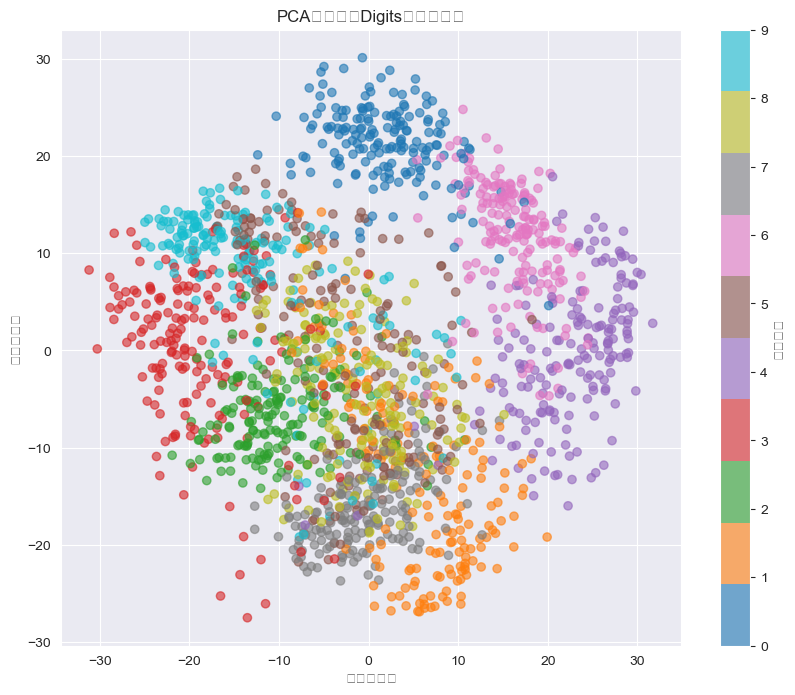

In [46]:
# load digits dataset
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_digits)

# 可视化降维后的数据
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_digits, cmap='tab10', alpha=0.6)
plt.title('PCA降维后的Digits数据可视化')
plt.xlabel('第一主成分')
plt.ylabel('第二主成分')
plt.colorbar(scatter, label='数字标签')
plt.show()

#### 4.2 PCA(n=30)：Reconstruction
选择30个主成分用于图像重建。
- 选择PCA降维，保留30个主成分用于图像重建
- 使用inverse_transform方法将降维后的数据恢复到原始数据空间
- 可视化原图像与重建图像的对比

当保留的主成分数量增加时，重建的图像质量会提高，但同时也会增加计算成本。在实际应用中，需要根据具体的任务和数据特性来选择合适的主成分数量。

C:\Users\yhb\AppData\Local\Temp\ipykernel_43360\1856734057.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing f

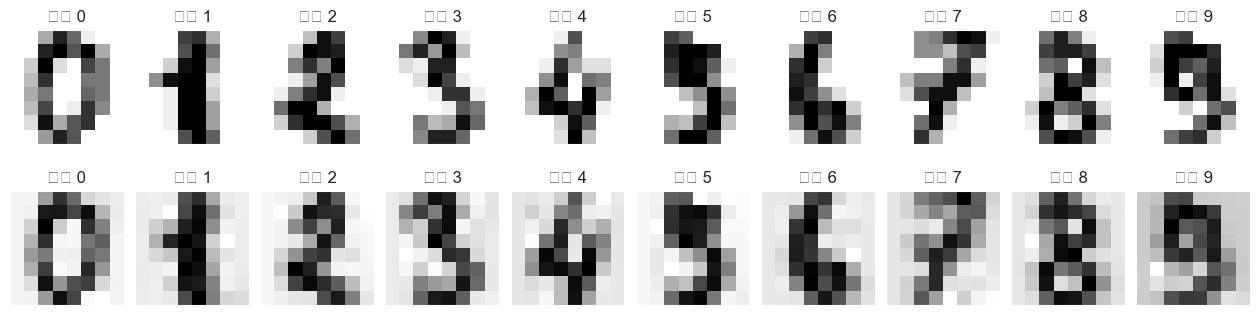

In [53]:
# 选择PCA降维，保留30个主成分用于图像重建
pca_rebuild = PCA(n_components=30)
X_pca_rebuild = pca_rebuild.fit_transform(X_digits)
X_reconstructed = pca_rebuild.inverse_transform(X_pca_rebuild)

# 可视化原图像与重建图像的对比
fig, axes = plt.subplots(2, 10, figsize=(16, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    axes[0, i].imshow(X_digits[i].reshape(8, 8), cmap='binary', interpolation='nearest') # 绘制原图
    axes[1, i].imshow(X_reconstructed[i].reshape(8, 8), cmap='binary', interpolation='nearest') # 绘制重建图
    axes[0, i].set_title(f'原图 {i}')
    axes[1, i].set_title(f'重建 {i}')

plt.tight_layout()
plt.show()

# 2. LDA: Linear Discriminant Analysis
线性判别分析（Linear Discriminant Analysis，LDA）是一种监着学习的统计方法，用于降维和分类。其基本原理是寻找一种线性组合方式，通过这种方式将高维的数据投影到较低维的空间中，同时使得投影后的数据在类间有最大的分离度和类内有最小的分散度，从而达到良好的分类效果。

LDA旨在最大化类间差异并最小化类内差异。由于LDA考虑了类别标签，并且是基于类别间和类别内的统计分布，所以相对于PCA，LDA对数据的尺度不那么敏感。然而，如果数据集中的特征量纲差异很大，标准化仍然可能有助于提高模型性能和稳定性。



## 2.1 基本原理

LDA的目标可以分为两个方面：
1. **最大化类间散度**：使得不同类别的数据在投影后尽可能地远离彼此。
2. **最小化类内散度**：使得同一类别的数据在投影后尽可能地靠近彼此。

数学上，LDA通过优化以下准则函数来实现这个目标：

$$\[ J(\mathbf{w}) = \frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_W \mathbf{w}} \]$$

其中，$\(\mathbf{w}\)$是投影向量，$\(S_B\)$是类间散度矩阵，$\(S_W\)$是类内散度矩阵。优化这个函数意味着我们寻找一个方向$\(\mathbf{w}\)$，在这个方向上，类间散度最大化而类内散度最小化。

### Compared with PCA
适用情况：由于PCA不利用类别信息，因此它更适合于探索性数据分析和去噪等任务。而LDA由于利用了类别信息，更适合于分类任务。
简而言之，尽管PCA和LDA都是通过找到数据的一个有效低维表示来实现降维，但它们的核心区别在于PCA关注于保留数据的总体结构（即方差），而LDA关注于最大化类别可分性。这导致它们在不同类型的任务中各有优势。

## Visualization
LDA考虑了数据的类别标签，目的是最大化不同类别数据的可分性。从图中可以明显看出，不同类别的数据在LDA处理后被更好地分离。

In [24]:
lda= LinearDiscriminantAnalysis(n_components=2) # 如果不指定n_components，LDA会将数据投影到最大的维度，且该维度<=n_classes-1
X_lda = lda.fit_transform(X, y) # LDA是监督学习，需要输入标签
X_lda

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

In [25]:
# explained variance
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

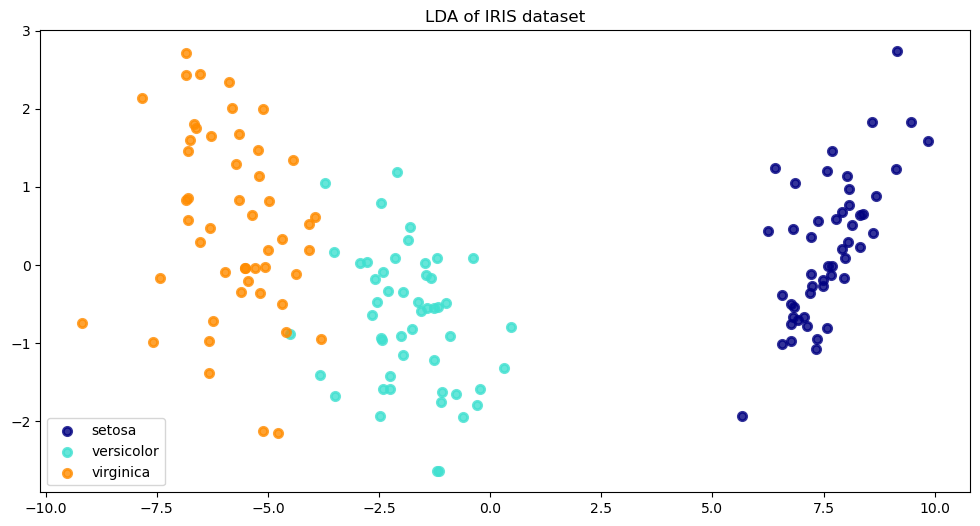

In [27]:
# visualization
plt.figure(figsize=(12, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()

# 3. t-SNE: t-distributed Stochastic Neighbor Embedding
t-SNE是一种非线性降维算法，属于无监督学习。它可以将高维数据投影到低维空间，以便可视化。t-SNE的基本思想是将高维空间中的数据点映射到低维空间中，使得原始空间中距离较近的数据点在映射后的低维空间中仍然保持较近的距离，而原始空间中距离较远的数据点在映射后的低维空间中保持较远的距离。

t-SNE主要关注于保持高维空间中数据点之间的相对距离（即，相似性）在低维空间的表示。尽管t-SNE对数据的尺度不像PCA那样敏感，但在某些情况下，如果数据的特征具有非常不同的量纲和数值范围，进行标准化可能有助于改善嵌入的质量和算法的稳定性。

对于tsne的使用，一般需要先使用PCA对数据进行降维，然后再使用t-SNE对降维后的数据进行降维。这样做的好处是，PCA可以帮助t-SNE找到更好的初始点位置，从而加速t-SNE的收敛速度。

## 3.1 基本原理

t-SNE（t-Distributed Stochastic Neighbor Embedding）是一种非常有效的高维数据可视化技术。它主要用于降维，特别是将高维数据集降至二维或三维以进行可视化。t-SNE的核心思想是在高维和低维空间中保持数据点之间的相似性。

t-SNE的步骤大致如下：

1. **计算高维空间中的相似性**：对于高维空间中的每对数据点，t-SNE首先计算它们之间的条件概率，这个概率反映了一个点选另一个点作为其邻居的可能性。这个概率与两点之间的距离有关，距离越近，概率越高。

2. **计算低维空间中的相似性**：t-SNE随机初始化每个点在低维空间中的位置，然后计算低维空间中每对点的相似性（也是用条件概率表示）。

3. **最小化相似性的KL散度**：t-SNE通过梯度下降最小化高维和低维空间中相似性分布之间的Kullback-Leibler（KL）散度。这一步的目的是调整低维空间中的点位置，使得低维空间的相似性尽可能接近高维空间的相似性。

4. **优化和可视化**：经过多次迭代后，低维空间的点位置逐渐稳定下来，此时低维空间中的点位置可以用于可视化。

## 3.2 优化策略
由于TSNE需要计算高维空间的所有数据点对之间的相似性，因此计算复杂度较高。为了提高效率，t-SNE通常会先使用PCA对数据进行降维，然后再使用t-SNE对降维后的数据进行降维。这样做的好处是，PCA可以帮助t-SNE找到更好的初始点位置，从而加速t-SNE的收敛速度。

另外，也可以通过设置不同的超参数来调整t-SNE的性能。
在`sklearn`的t-SNE实现中，有几个参数可以帮助你优化算法的执行，尽管直接的优化策略（如使用树结构进行最近邻搜索）是内置的，不需要用户手动设置。但是，可以通过调整这些参数来加速t-SNE的运行时间或提高结果的质量：

1. **`n_iter`**：这是算法运行的迭代次数。虽然更多的迭代可能会导致更准确的嵌入结果，但也会相应地增加计算时间。默认值通常足够大，以确保算法收敛，但如果你正在处理非常大的数据集并且希望减少运行时间，可以尝试减少迭代次数。

2. **`n_iter_without_progress`**：这个参数设置了在停止优化前，如果没有进展（即，优化的成本没有显著下降），算法可以运行的最大迭代次数。减少这个值可以在没有明显进步时更早地停止算法，从而节省时间。

3. **`perplexity`**：这个参数与条件概率的计算密切相关，影响到局部邻域的大小。虽然它不直接影响计算速度，但选择合适的`perplexity`值可以改善结果的质量和稳定性，间接影响到优化的效率。`perplexity`的一个好的起始点是30，对于较大的数据集，可能需要尝试更大的值。perplexity可以看作是每个数据点在高维空间中考虑多少邻近点的一个度量，通常可以理解为邻域的大小。t-SNE会试图保持高维数据中邻近点的局部结构，同时在低维空间中展示出全局结构。

4. **`early_exaggeration`**：在优化的早期阶段，t-SNE会放大特征之间的距离，以帮助空间布局的形成。调整这个参数可能会影响算法的运行速度和结果的质量。增加`early_exaggeration`的值可能会让算法更容易找到一个更好的全局结构，但也可能需要更多的迭代次数。

5. **`learning_rate`**：学习率对优化过程至关重要。太高或太低的学习率都可能导致结果不理想或者算法收敛得很慢。通常，学习率在200到1000之间效果较好。

6. **`method`**：对于大规模数据集，`method='barnes_hut'`是一个好的选择，因为它使用了Barnes-Hut近似来加速邻居搜索和梯度计算。对于非常大的数据集，可以尝试`method='exact'`以外的方法以获得更好的性能。

`perplexity`可以看作是每个数据点在高维空间中考虑多少邻近点的一个度量，通常可以理解为邻域的大小。t-SNE会试图保持高维数据中邻近点的局部结构，同时在低维空间中展示出全局结构。
较小的困惑度倾向于捕捉更精细的数据结构，而较大的困惑度可能会显示更广泛的数据群集。
并且当`perplexity`较低时，模型可能无法捕捉到足够的全局结构，导致不同类别之间的界限不清晰。增加`perplexity`可以帮助模型在保持局部结构的同时更好地揭示全局结构。但是，这并不是一个严格的规则，因为t-SNE的结果也受到其他参数设置和数据本身的影响。


In [17]:
# t-SNE
tsne = TSNE(n_components=2, random_state=0,perplexity=100)
X_tsne = tsne.fit_transform(X)
X_tsne

array([[-16.11472   ,  -0.7988587 ],
       [-16.195547  ,  -1.0041825 ],
       [-16.093746  ,  -0.99085575],
       [-16.193274  ,  -1.0335593 ],
       [-16.086931  ,  -0.8006194 ],
       [-16.224604  ,  -0.6257939 ],
       [-16.099499  ,  -0.9694018 ],
       [-16.182022  ,  -0.8518205 ],
       [-16.153202  ,  -1.1100762 ],
       [-16.207373  ,  -0.9771876 ],
       [-16.141293  ,  -0.6746478 ],
       [-16.214235  ,  -0.91010064],
       [-16.16219   ,  -1.0245333 ],
       [-16.014225  ,  -1.0949392 ],
       [-16.000004  ,  -0.58959943],
       [-16.0497    ,  -0.511142  ],
       [-16.055742  ,  -0.6551825 ],
       [-16.134953  ,  -0.792125  ],
       [-16.2423    ,  -0.59345603],
       [-16.120447  ,  -0.7115752 ],
       [-16.313374  ,  -0.742673  ],
       [-16.160038  ,  -0.72538394],
       [-15.950353  ,  -0.90984035],
       [-16.364277  ,  -0.8372181 ],
       [-16.358515  ,  -0.8806732 ],
       [-16.307898  ,  -0.9562647 ],
       [-16.27707   ,  -0.8366873 ],
 

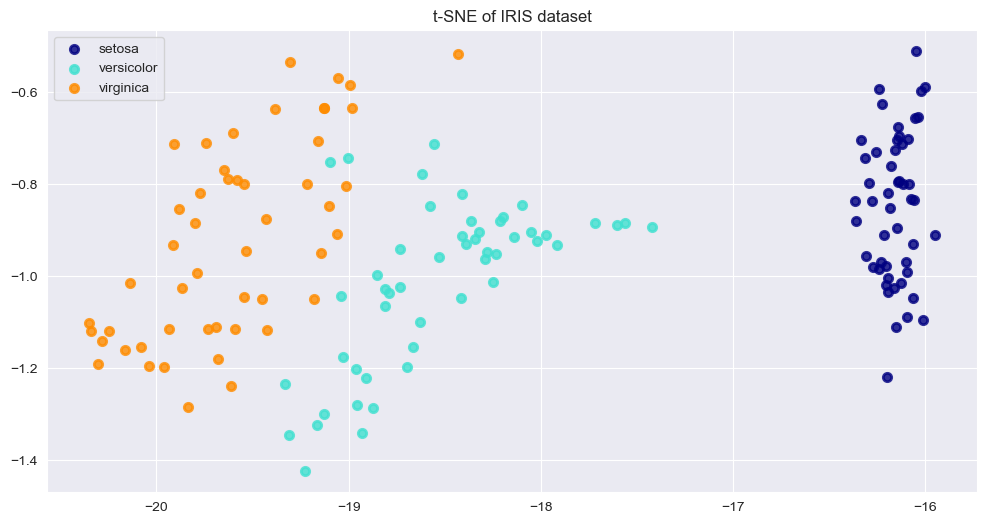

In [18]:
# visualization
plt.figure(figsize=(12, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE of IRIS dataset')
plt.show()

### Comparison for PCA, LDA and t-SNE
t-SNE、PCA（主成分分析）和LDA（线性判别分析）都是降维技术，但它们有不同的特点和适用场景：

1. **PCA (主成分分析)**:
    - **优点**:
        - 计算效率高：PCA通常比t-SNE更快，特别是在处理大数据集时。
        - 易于理解：PCA寻找的是最大化方差的正交成分，结果易于解释。
        - 线性算法：对于线性关系的数据表现良好。
    - **缺点**:
        - 线性限制：只能捕捉线性关系，对于非线性结构的数据表现不佳。
        - 对异常值敏感：异常值可能会对主成分分析的结果产生很大影响。
        - 方差优先：PCA仅仅考虑方差最大化，可能会忽略类别之间的区分。

2. **LDA (线性判别分析)**:
    - **优点**:
        - 考虑类别信息：LDA旨在找到最佳的类别可分性。
        - 结果易于解释：与PCA类似，LDA的结果也较易解释。
        - 计算效率：LDA的计算效率通常较高。
    - **缺点**:
        - 线性限制：与PCA类似，LDA不能很好地处理非线性关系。
        - 需要类别标签：LDA需要预先定义的类别标签才能运行。
        - 类别分布假设：LDA假设数据符合高斯分布，具有相同的协方差矩阵，这在实际中可能不成立。

3. **t-SNE (t-分布随机邻域嵌入)**:
    - **优点**:
        - 非线性映射：t-SNE能够捕捉数据的复杂非线性结构。
        - 局部与全局结构：t-SNE旨在同时保留数据的局部和全局结构。
        - 可视化效果佳：尤其是在二维或三维空间中可视化高维数据时，t-SNE通常能给出直观的结果。
    - **缺点**:
        - 计算成本高：尤其是对于大数据集，t-SNE的计算开销很大。
        - 随机性：t-SNE结果对随机种子的选择非常敏感，可能需要多次运行以获得稳定的结果。
        - 结果难以解释：由于t-SNE的非线性和概率本质，其降维结果很难量化和解释。
        - 不保留距离：t-SNE优化的是相似性概率而非实际距离，因此无法保留原始数据点之间的实际距离。

综上所述，选择哪种降维技术取决于数据的特性、分析的目的以及对算法解释性的需求。PCA和LDA更适用于数据具有明显线性结构且计算效率是关键因素时。t-SNE更适合用于探索性的数据分析和可视化，尤其是当数据包含复杂的非线性结构时。

# 4. UMAP: Uniform Manifold Approximation and Projection
UMAP（Uniform Manifold Approximation and Projection）是一种用于降维的算法，非常适用于可视化高维数据。它由Leland McInnes、John Healy等人开发，旨在保留原始数据的局部和全局结构，因此非常适合探索性数据分析和机器学习中的数据可视化。

UMAP的工作原理基于流形学习的概念，即假设数据是在高维空间中均匀分布在一个或多个流形上的。UMAP试图在低维空间中重建这些高维流形的结构，从而减少数据的维度，同时尽可能保留数据点之间的距离关系。这样，它能够揭示高维数据中可能隐藏的模式和结构。

与t-SNE（t-distributed Stochastic Neighbor Embedding）这类流行的降维技术相比，UMAP在保留全局数据结构方面表现更好，同时在计算效率上也有优势，尤其是在处理大型数据集时。UMAP可用于各种类型的数据和多种任务中，包括但不限于生物信息学、图像处理和自然语言处理等领域。

使用UMAP进行数据降维通常涉及以下步骤：

1. 选择合适的距离度量（如欧氏距离、曼哈顿距离等），根据数据的特性和任务需求确定。
2. 通过UMAP算法将高维数据映射到低维空间（通常是2D或3D），以便于可视化或进一步分析。
3. 调整UMAP的参数（如邻居的数量、最小距离等），以优化降维结果。

UMAP的Python实现可通过`umap-learn`包获得，该包可以通过pip安装，并且易于使用。通过UMAP，研究人员和数据科学家可以更有效地探索和理解复杂的高维数据集。


1. **n_neighbors**：default=15
   - 作用：控制UMAP用于流形近似的局部邻域大小。
   - 详情：较小的值会强调数据的局部结构，而较大的值会帮助找出更加全局的数据结构。这个参数对结果影响较大。

2. **min_dist**：default=0.1
   - 作用：控制嵌入空间中点之间的最小距离。
   - 详情：较小的值会导致更紧密的聚集，用于保持局部结构，而较大的值会导致嵌入空间更加均匀。

3. **n_components**：
   - 作用：目标空间的维度。
   - 详情：通常为2或3，用于可视化。增加维度可以捕获更多的结构，但也更难以理解和可视化。

4. **metric**：
   - 作用：用于计算距离的度量。
   - 详情：UMAP可以使用多种距离度量，默认是欧氏距离。不同的度量会导致不同的结构被捕获。

5. **n_epochs**：
   - 作用：优化过程的迭代次数。
   - 详情：更多的迭代可以更好地优化低维表示，但会增加计算时间。

6. **learning_rate**：
   - 作用：优化过程中的学习率。
   - 详情：较高的学习率可能会导致优化过程快速收敛，但也可能会错过局部最小值。

7. **init**：
   - 作用：低维空间的初始化方式。
   - 详情：可以是随机初始化或者使用'spectral'方法，后者通常可以得到更稳定和可靠的结果。

8. **random_state**：
   - 作用：随机数生成器的种子。
   - 详情：用于复现结果，保持实验的可重复性。

UMAP的参数选择依赖于具体的数据集以及任务需求。实践中，通常需要尝试不同的参数组合，来观察哪些参数对结果影响最大，并找到最适合您数据的参数。调参时，建议从`n_neighbors`和`min_dist`开始，因为这两个参数对UMAP的结果有着显著的影响。

# 5. GTM: Generative Topographic Mapping (生成式拓扑映射)
生成拓扑映射（Generative Topographic Mapping，GTM）是一种非线性数据降维和可视化方法，由Bishop等人在1998年提出。GTM可以被看作是自组织映射（SOM）的概率版本，旨在通过概率模型在低维空间中保持数据的拓扑结构，从而实现数据的可视化和降维。

### 数学原理

GTM通过在低维潜在空间中定义一个连续的潜在空间，并通过参数化的非线性映射将其映射到高维的观察空间中。具体地，GTM通过以下几个步骤来建模数据：

1. **潜在空间的定义**：选择一个低维的潜在空间（通常是2维或3维以便于可视化），并在该空间中均匀分布一组潜在点。

2. **非线性映射**：通过一个参数化的非线性函数（通常是径向基函数rbf网络或多项式函数）将潜在空间中的点映射到高维的数据空间中。这个映射由一组参数控制，这些参数需要通过数据学习得到。

3. **概率分布**：在高维空间中，每个映射点周围通过高斯分布来模拟数据点的分布。这样，每个数据点可以被看作是由某个潜在点生成，且生成的过程带有一定的不确定性。

4. **参数学习**：通过最大化数据的似然函数来学习映射的参数。这通常通过迭代算法，如EM算法来实现。
生成拓扑映射（GTM）作为一种概率模型，其核心目标并非直接对数据进行降维，而是创建一个从低维潜在空间到高维观测数据空间的非线性映射。这个过程确实涉及到“降维”的概念，但是以一种间接的方式：通过学习潜在空间和观测数据之间的关系，GTM能够揭示数据的内在结构，并允许我们在低维空间中对数据进行可视化和分析。

### 如何进行降维

GTM通过以下步骤实现数据的降维和可视化：

1. **潜在空间定义**：首先，定义一个低维的潜在空间（通常是2D或3D以便于可视化），这个空间包含了一组均匀分布的潜在点。这个空间代表了数据的简化或压缩形式。

2. **数据映射**：通过非线性映射（通常使用RBF网络或其他参数化函数），GTM将低维潜在空间中的每个点映射到高维数据空间中。这个映射过程涉及到寻找最佳的映射参数，以使得映射后的点能够最好地代表原始数据集的分布。

3. **反向投影**：虽然GTM的主要过程是将潜在空间映射到数据空间，但通过模型我们也可以进行反向操作，即将高维数据点“投影”回低维潜在空间。这通常通过找到每个高维数据点在潜在空间中的“最佳匹配点”来实现，具体方法是计算每个数据点对应于不同潜在点的责任（或归属概率）。

### 降维与数据投影

在GTM中，降维不是通过直接减少数据的维度来实现的，而是通过学习数据在低维潜在空间中的表示。数据投影则是通过计算数据点在潜在空间中的对应位置来完成的。这允许我们在保持数据内在拓扑结构的前提下进行可视化和分析。

与传统的线性降维技术（如PCA）不同，GTM提供了一种基于概率的方法来理解数据的内在结构，特别是在数据具有非线性结构时。通过反向投影的方式，GTM能够将高维数据点映射回低维潜在空间，这在某种意义上完成了降维操作，同时为数据的进一步分析和解释提供了便利。

通过形成数据分布的连续映射来寻找低维嵌入。它提供了一种概率框架，通常结果在视觉上呈现出**网格**状结构，这是因为GTM在低维空间中使用了一个预定义的网格，通过概率分布将每个高维数据点映射到这个网格上。

总的来说，GTM通过在低维潜在空间和高维数据空间之间建立一个概率映射，使我们能够在降维和数据投影的过程中揭示并利用数据的内在结构。这种方法特别适用于探索性数据分析和复杂数据集的可视化，它提供了一种强大的工具来理解数据的多维性质及其潜在的结构特征。


### eGTM参数设置
使用ugtm库中的eGTM函数可实现。下面是该函数的参数设置：

   - `k`：GTM 节点的平方根。例如，`k=25` 表示将 GTM 划分为 25x25 的格网。更细粒度的映射：增加 k 会使得模型的潜在空间网格更加密集，能够在高维数据中捕捉到更细粒度的结构。随着节点数量的增加，模型能够表达的复杂性也随之提高，可能会更好地拟合数据的细节。如果 k 值过大，模型可能会捕捉到数据中的噪声，而不仅仅是底层的结构，这可能导致过拟合。
   - `m`：RBF 中心的平方根。例如，`m=5` 表示 RBF 函数将被安排在一个 5x5 的格网上。随着 m 的增加，数据点的聚类趋于更加细致。这表明在选择 m 值时需要考虑到数据的本质和所需的可视化粒度。一个过小的 m 可能无法揭示数据的结构，而一个过大的 m 可能会捕捉到噪声，或者过度强调数据中的随机波动。
   - `s`：RBF 宽度因子，用于调整 RBF 函数的宽度，影响流形的灵活性。
   - `regul`：正则化系数，用于防止模型过拟合。
   - `random_state`：随机状态，用于确保结果的可重现性。
   - `niter`：EM 算法的迭代次数，影响模型拟合的精度和时间。
   - `verbose`：冗长模式，如果设置为 True，将在 EM 算法执行期间输出对数似然值。
   - `prior`：类别先验类型。`'estimated'` 用于考虑类别不平衡，`'equiprobable'` 假设所有类别先验概率相等。

```python
gtm=ugtm.eGTM() # 创建一个eGTM对象
gtm.fit(data) # 拟合模型
embedding = gtm.transform(data) # 数据投影到潜在空间--一般都是2维
```

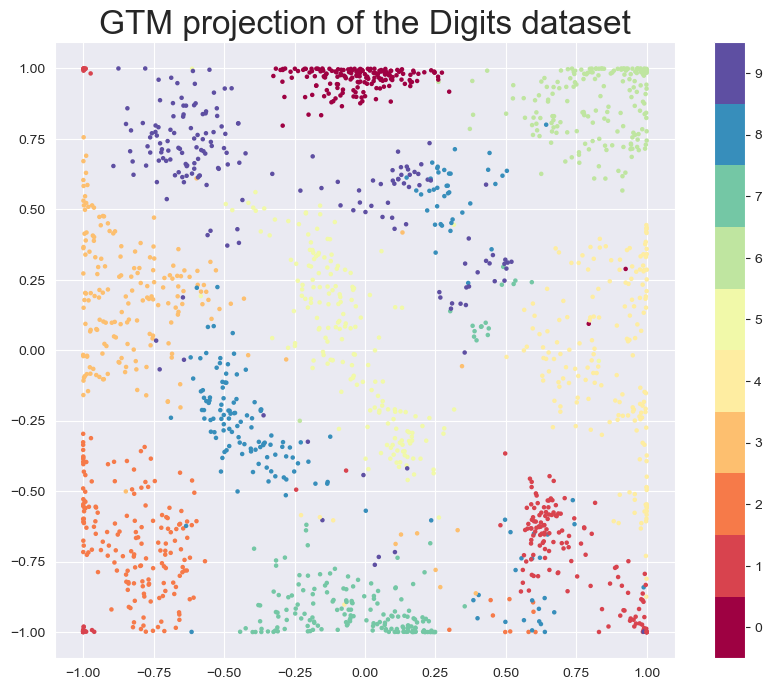

In [25]:
import ugtm
from sklearn.datasets import load_digits

digits = load_digits()

gtm = ugtm.eGTM(k=30, m=6, s=1, regul=0.5, random_state=1729)
gtm.fit(digits.data) # 拟合模型
embedding = gtm.transform(digits.data) # 数据投影到潜在空间(一般都是2维)

#Plotting code for a good figure.
plt.figure(figsize=(10, 8))

plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim') # 保持纵横比
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('GTM projection of the Digits dataset', fontsize=24)
plt.show()

#  More Data Projection Methods

除了PCA、LDA和t-SNE，还有其他一些数据投影方法，包括线性和非线性方法：

### 线性方法
- **多维缩放（MDS）**：旨在在低维空间中保持数据点间的距离，尽可能与高维空间中的距离相似。
- **因子分析（FA）**：假定观测变量由潜在的几个因子和特定的误差项构成，通过数据中变量间的相关性来寻找这些潜在因子。

### 非线性方法
- **自组织映射（SOM）**：是一种人工神经网络，用于将高维数据投影到通常为二维的低维空间中，同时保持数据的拓扑结构。
- **局部线性嵌入（LLE）**：通过保持数据点之间的局部线性关系来降维，试图在低维空间中保留高维空间中邻居间的距离。
- **等度量映射（Isomap）**：一种流形学习方法，旨在保持数据点之间的测地距离，结合了经典MDS的全局视角和LLE的局部视角。
- **均匀流形近似（UMAP）**：一种新兴的非线性降维方法，旨在保持数据点之间的局部结构。该算法主要目标是在保持数据全局结构的同时，尽可能准确地表示数据中的局部结构。这是通过寻找高维数据中的均匀流形结构来实现的。

### Python中的实现
大多数这些方法都可以在`sklearn`库中找到实现，例如：

```python
from sklearn.manifold import MDS, TSNE, Isomap
from sklearn.decomposition import FactorAnalysis
from sklearn.neighbors import LocalLinearEmbedding

# 示例：使用MDS
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)  # X是原始数据

# 示例：使用Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)
```

选择哪种降维技术取决于具体的数据特性和分析目标。线性方法通常计算效率更高，适合于数据结构简单或者是线性分布的情况。而非线性方法虽然计算成本更高，但能更好地处理复杂的数据结构，尤其是当数据嵌入在低维流形中时。

#  Practice: MNIST Dataset
我们将使用PCA, LDA和t-SNE对MNIST数据集进行降维，并进行可视化。MNIST数据集包含手写数字图像，每个图像是28x28像素的灰度图像。我们将使用这些图像来演示不同降维方法的效果。

MNIST数据集是idx格式，这种格式是一种简单的二进制格式，用于存储多维数组和标签。我们可以使用`idx2numpy`库来读取这些数据。也可以直接使用`torchvision`库的`datasets`模块来加载MNIST数据集，并将其转换为NumPy格式。

In [29]:
# 设置数据转换器
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # 标准化
])

# 加载MNIST数据集
train_dataset = datasets.MNIST(root='E:\\Programming\\anaconda3\\envs\\DeepLearning\\data', train=True, download=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=10000, shuffle=False)

# 转换为NumPy格式
dataiter = iter(train_loader)
images, labels = next(dataiter)  # 使用内置的next()函数
images = images.numpy() # [(10000, 1, 28, 28)
labels = labels.numpy() # [10000,]

# 展平图像数据
# 原始图像数据的形状为 (10000, 1, 28, 28) 10000个样本，每个样本是1个通道的28x28图像，通道表示颜色，灰度图像只有一个通道
# 需要将其变为 (10000, 28*28)，即 (样本数量, 特征数量)
X_flat = images.reshape(images.shape[0], -1)

4

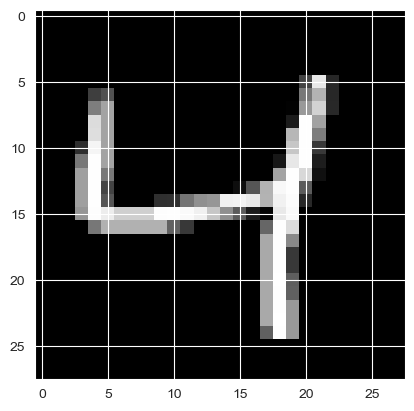

In [30]:
# 绘制MNIST数据集的一个图像
# imshow()函数用于绘制图像，cmap参数用于指定颜色图谱，这里使用灰度图谱
plt.imshow(images[2].reshape(28, 28), cmap='gray')
labels[2]

### Reduce Dimension and Visualization
分别使用PCA, LDA,t-SNE和UMAP,GTM将MNIST数据集降维到2维，并进行可视化。

In [37]:
# PCA
pca = PCA(n_components=2, random_state=43)
X_pca = pca.fit_transform(X_flat)

# LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_flat, labels)

# t-SNE
tsne = TSNE(n_components=2, random_state=43)
X_tsne = tsne.fit_transform(X_flat)

# Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_flat)

# umap
# 参数n_neighbors表示每个点的近邻数量，min_dist表示降维后的点之间的最小距离
# per
umap = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2,n_jobs=-1)
X_umap = umap.fit_transform(X_flat)

# GTM
gtm = ugtm.eGTM(k=10, m=6, s=1, regul=0.5, random_state=1729)
X_gtm = gtm.fit_transform(X_flat)

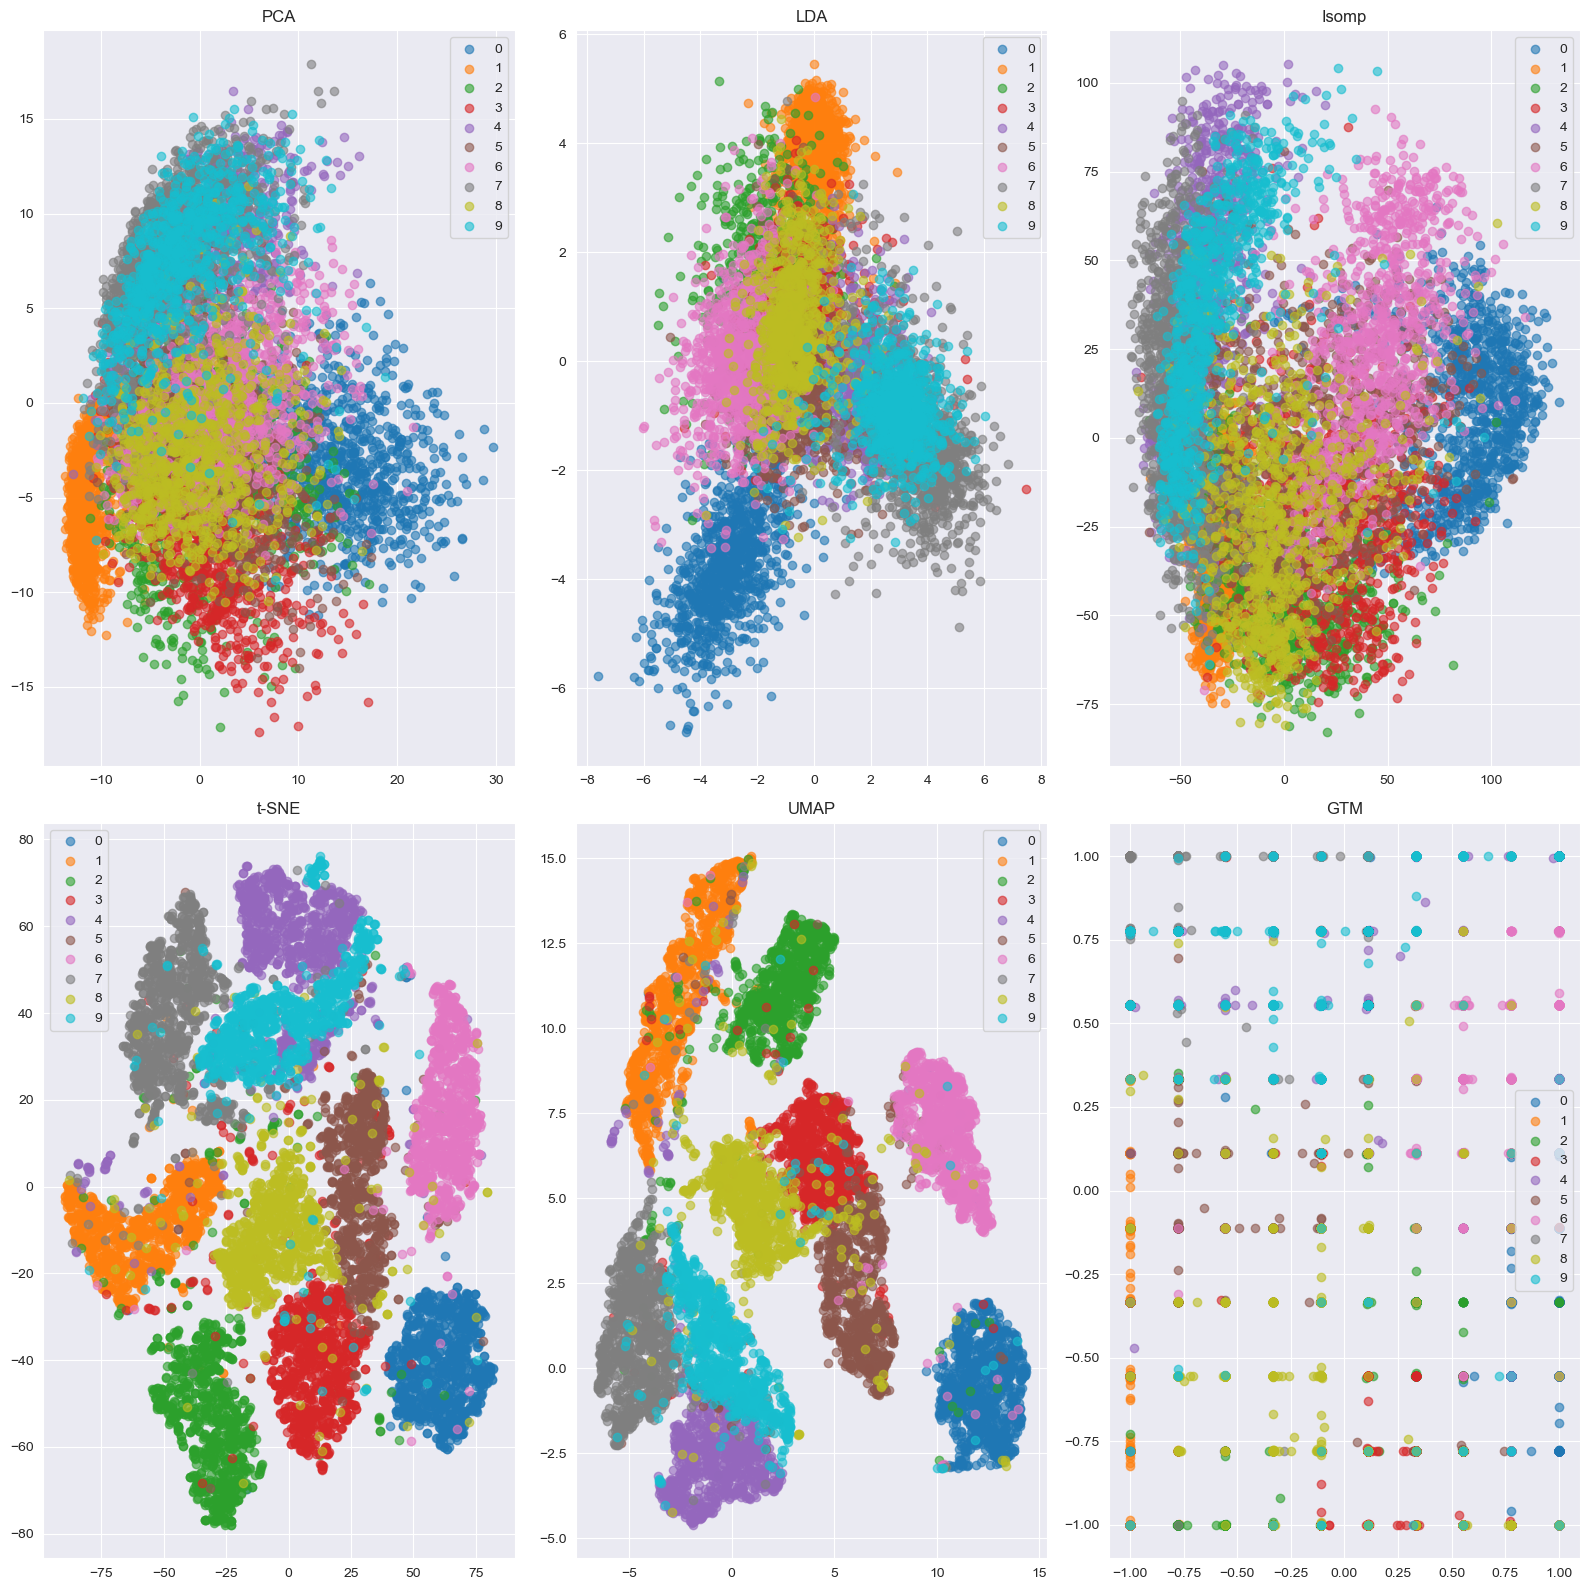

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(16, 16))
class_names = [str(i) for i in range(10)]  # 创建类别名称列表，这里是'0'到'9'的字符串

for ax, X, title in zip(axes.flatten(), [X_pca, X_lda,X_isomap, X_tsne ,X_umap,X_gtm], ['PCA', 'LDA', 'Isomp','t-SNE', 'UMAP','GTM']):
    # 分别为每个类别绘制散点图
    for i in range(10):
        ax.scatter(X[labels == i, 0], X[labels == i, 1], label=class_names[i], alpha=0.6)
    
    ax.set_title(title)
    ax.legend()  # 显示图例

plt.tight_layout()
plt.show()



1. **PCA（主成分分析）**：在PCA图中，数据点被投影到了两个主要的方向上，这些方向是数据方差最大的方向。PCA图显示了一些数字类别之间的重叠，尤其是在图像中心附近。然而，我们也可以看到某些类别（如红色和橙色区域）开始在边缘形成独立的聚类。

2. **LDA（线性判别分析）**：LDA旨在最大化类别间的差异，并最小化类别内的差异。在LDA图中，数据点更清晰地按类别分开，表明LDA在MNIST数据集上的效果比PCA好。每个类别看起来更紧凑且与其他类别之间有更好的分离。

3. **t-SNE（t-分布随机邻域嵌入）**：t-SNE是一种非线性降维技术，非常擅长保持数据局部结构，在图中明显可见。在t-SNE图中，数据点被显著地分散成不同的簇，表明不同数字的图像在高维空间中相距较远。这种分离效果通常对于高维数据的可视化非常有帮助。

4. **UMAP（统一流形近似和投影）**：UMAP是一种相对较新的非线性降维技术，也专注于保留数据的局部和全局结构。在UMAP图中，类别之间的分离非常清晰，且聚类效果非常好，这表明UMAP在MNIST数据集上提供了高质量的降维表示。

总的来说，t-SNE和UMAP提供了更清晰的类别分离，这对于一些特定的机器学习任务可能是有益的。而PCA和LDA提供了更快的计算速度，但可能不如t-SNE和UMAP在保持数据结构方面那么有效。不同的降维技术会根据不同的需求（如速度、精度、保留数据结构等）展现出不同的优势。在选择使用哪种技术时，应根据特定应用的需求来决定。